In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ulya1\Desktop\Proyekt Qarabag\Qarabag FK 2026.csv")
df.head()




,match_id,club,season,competition,match_date,opponent,home_away,goals_scored,goals_conceded,result,points,attendance
0,1,Qarabag FK,2025/26,Champions League,9/17/2025,Benfica,Away,3,2,Win,3,52000
1,2,Qarabag FK,2025/26,Champions League,10/1/2025,Copenhagen,Home,2,0,Win,3,29500
2,3,Qarabag FK,2025/26,Champions League,10/22/2025,Athletic Club,Away,1,3,Loss,0,41000
3,4,Qarabag FK,2025/26,Champions League,11/5/2025,Chelsea,Home,2,2,Draw,1,31200
4,5,Qarabag FK,2025/26,Champions League,11/26/2025,Napoli,Away,0,2,Loss,0,45000


In [3]:
total_matches = len(df)
total_points = df["points"].sum()
avg_goals = df["goals_scored"].mean()

total_matches, total_points, avg_goals


(8, np.int64(10), np.float64(1.625))

In [4]:
df.groupby("home_away")[["points","goals_scored","goals_conceded"]].mean()


,points,goals_scored,goals_conceded
home_away,,,
Away,0.75,1.00,3.25
Home,1.75,2.25,2.00


In [5]:
df["goal_diff"] = df["goals_scored"] - df["goals_conceded"]
df[["opponent","goal_diff"]].sort_values("goal_diff")


,opponent,goal_diff
7,Liverpool,-6
2,Athletic Club,-2
4,Napoli,-2
5,Ajax,-2
3,Chelsea,0
0,Benfica,1
6,Eintracht Frankfurt,1
1,Copenhagen,2


Total Matches: 8
Total Points: 10
Goals Scored: 13
Goals Conceded: 21
Win / Draw / Loss: 3 / 1 / 4


C:\Users\ulya1\AppData\Local\Temp\ipykernel_29500\2789759670.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="opponent", y="points", data=df, palette="Blues_d")


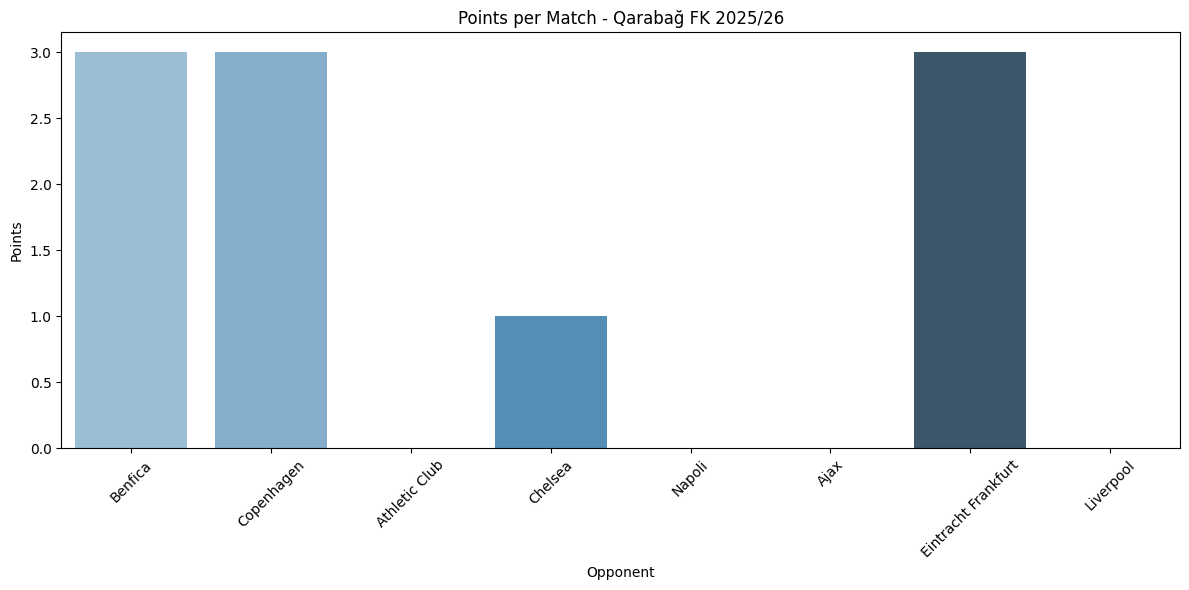

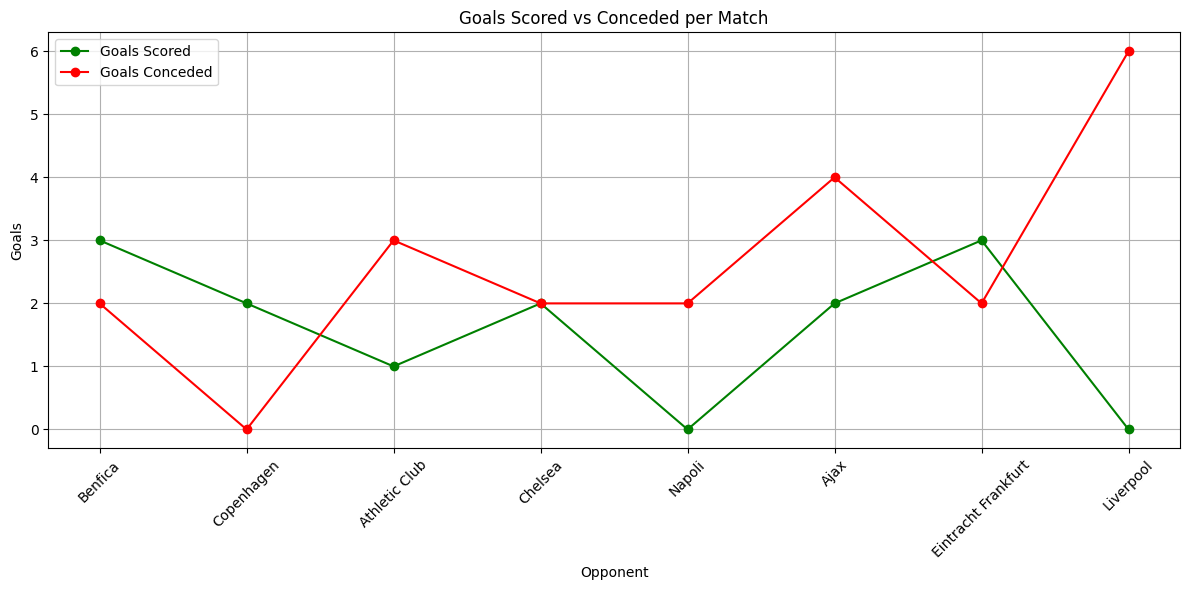

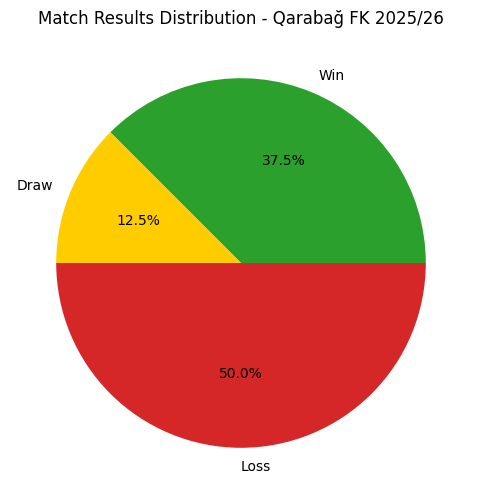

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\ulya1\Desktop\Proyekt Qarabag\Qarabag FK 2026.csv")


total_matches = len(df)
total_points = df["points"].sum()
total_goals_scored = df["goals_scored"].sum()
total_goals_conceded = df["goals_conceded"].sum()
win_count = (df["result"]=="Win").sum()
draw_count = (df["result"]=="Draw").sum()
loss_count = (df["result"]=="Loss").sum()

print(f"Total Matches: {total_matches}")
print(f"Total Points: {total_points}")
print(f"Goals Scored: {total_goals_scored}")
print(f"Goals Conceded: {total_goals_conceded}")
print(f"Win / Draw / Loss: {win_count} / {draw_count} / {loss_count}")

#Bar chart: Points per Match
plt.figure(figsize=(12,6))
sns.barplot(x="opponent", y="points", data=df, palette="Blues_d")
plt.title("Points per Match - Qarabağ FK 2025/26")
plt.xlabel("Opponent")
plt.ylabel("Points")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line chart: Goals Scored & Conceded over Matches
plt.figure(figsize=(12,6))
plt.plot(df["match_id"], df["goals_scored"], marker='o', label="Goals Scored", color='green')
plt.plot(df["match_id"], df["goals_conceded"], marker='o', label="Goals Conceded", color='red')
plt.xticks(df["match_id"], df["opponent"], rotation=45)
plt.title("Goals Scored vs Conceded per Match")
plt.xlabel("Opponent")
plt.ylabel("Goals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3️⃣ Pie chart: Win / Draw / Loss Distribution ---
plt.figure(figsize=(8,6))
plt.pie([win_count, draw_count, loss_count],
        labels=["Win","Draw","Loss"],
        autopct="%1.1f%%",
        colors=["#2ca02c","#ffcc00","#d62728"])
plt.title("Match Results Distribution - Qarabağ FK 2025/26")
plt.show()
